In [1]:
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_a = pd.read_csv('../data/a_lvr_land_a.csv')
df_b = pd.read_csv('../data/b_lvr_land_a.csv')
df_e = pd.read_csv('../data/e_lvr_land_a.csv')
df_f = pd.read_csv('../data/f_lvr_land_a.csv')
df_h = pd.read_csv('../data/h_lvr_land_a.csv')

In [3]:
df_a.head(1)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN,NaN


In [4]:
print("df_a.shape:", df_a.shape)
print("df_b.shape:", df_b.shape)
print("df_e.shape:", df_e.shape)
print("df_f.shape:", df_f.shape)
print("df_h.shape:", df_h.shape)

df_a.shape: (787, 33)
df_b.shape: (1390, 33)
df_e.shape: (1293, 33)
df_f.shape: (1685, 33)
df_h.shape: (1478, 33)


In [5]:
pd_list = [df_a, df_b, df_e, df_f, df_h]  # List of your dataframes
df_all = pd.concat(pd_list, axis=0)  # concatenate along {0/’index’, 1/’columns’}
print("df_all.shape:", df_all.shape)
df_all.head(2)

df_all.shape: (6633, 33)


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN,NaN
1,中正區,車位,汀州路一段91~120號,0.74,都市：其他:第三種住宅區。,NaN,NaN,1100111,土地1建物1車位1,地下二層,...,坡道平面,24.67,300000,親友、員工、共有人或其他特殊關係間之交易;僅車位交易;,RPPNMLNLJHGGFAA56DA,0.0,0.0,0.0,有,NaN


In [6]:
len(set(df_all['主要用途'].values.tolist()))

244

### filter_a

從 df_all 做出
1. 主要用途 為 住家用
2. 建物型態 為 住宅大樓
3. 總樓層數 為 大於等於十三層

In [7]:
# df_filter_a = df_all[['主要用途', '建物型態', '總樓層數']]
df_filter_a = df_all
df_filter_a = df_filter_a[(df_filter_a['主要用途'].str.contains("住家用", na=False)) &
                          (df_filter_a['建物型態'].str.contains("住宅大樓", na=False))
                         ]
print("sorted(list(set(df_filter_a['總樓層數']))):", sorted(list(set(df_filter_a['總樓層數']))))
df_filter_a.head(3)

sorted(list(set(df_filter_a['總樓層數']))): ['三十一層', '三十七層', '三十九層', '三十五層', '三十八層', '三十六層', '三十層', '二十一層', '二十七層', '二十三層', '二十九層', '二十二層', '二十五層', '二十八層', '二十六層', '二十四層', '二十層', '十一層', '十七層', '十三層', '十九層', '十二層', '十五層', '十八層', '十六層', '十四層', '四十一層', '四十三層', '四十二層', '四十層']


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
7,文山區,房地(土地+建物)+車位,興隆路三段181巷61~90號,34.23,都市：其他:第二種住宅區。,NaN,NaN,1090711,土地3建物1車位1,九層,...,坡道機械,15.23,0,NaN,RPQOMLOLKHGGFAA96DA,64.91,5.83,6.08,有,NaN
16,萬華區,房地(土地+建物)+車位,長沙街二段61~90號,6.65,都市：其他:第四種商業區。,NaN,NaN,1100220,土地1建物1車位1,七層,...,其他,0.0,0,NaN,RPSOMLPJLHGGFBA27DA,47.59,0.00,3.03,有,NaN
19,大同區,房地(土地+建物)+車位,南京西路211~240號,24.79,都市：其他:第三種商業區。,NaN,NaN,1100209,土地1建物1車位2,八層,...,坡道平面,51.24,0,NaN,RPTOMLSJLHGGFBA67DA,138.35,11.12,11.60,有,5.0


![img1](https://upload-images.jianshu.io/upload_images/256855-312b19ff4fcaae34.png)

In [8]:
int_mapping = {'一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9}

# def floor_to_int(str_floor):
#     str_floor = str_floor.split('層')[0]
#     floor_10 = int_mapping[str_floor.split('十')[0]]
#     floor_1 = int_mapping[str_floor.split('十')[1]]
#     int_floor = 10 * floor_10 + floor_1
#     return int_floor


import re
import string
common_used_numerals_tmp ={'零': 0, '一': 1, '二': 2, '兩': 2, '三': 3, '四': 4, '五': 5, 
                           '六': 6, '七': 7, '八': 8, '九': 9, '十': 10, 
                           '百': 100, '千': 1000, '萬': 10000, '億': 100000000}


def chstring2int(uchar):
    """
    purpose: we want to recognize the floor of the building,
    we do a mapping from Chinese character to digital integer
    
    """
    if '層' in uchar:
        uchar = uchar.split('層')[0]
        
    # for the exception case 二十層
    if len(uchar) == 2 and uchar.startswith('十'):
        floor_1 = common_used_numerals_tmp[uchar.split('十')[1]]
        total_sum = 10 * 1 + floor_1
    
    else:
        print("===***=== original input:", uchar)
        # 1. 按億、萬分割字串
        sep_char = re.split(r'億|萬', uchar)  # 一億三千二百四十二萬五百二十三
        total_sum = 0
        print("sep_char:", sep_char)  # ['一', '零三百三十', '五十']
        for i, sc in enumerate(sep_char):
            print("-level 1: 'i, sc' = {}, {}".format(i, sc))
            # 2. 對每一部分進行轉化處理，比如第二部分["三千二百四十二"]
            split_num = sc.replace('千', '1000').replace('百', '100').replace('十', '10')
            int_series = re.split(r'(\d{1,})', split_num)
            int_series.append("")
            int_series = ["".join(i) for i in zip(int_series[0::2], int_series[1::2])]
            int_series = ['零' if i == '' else i for i in int_series]
            print("int_series:", int_series)
            num = 0
            # int_series：["三1000", "二100", "四10", "二"]
            # 3. 求和加總 int_series
            for ix, it in enumerate(int_series):
                it = re.sub('零', '', it) if it != '零' else it
                print("--level 2: 'ix, it' = {}, {}".format(ix, it))
                temp = common_used_numerals_tmp[it[0]]*int(it[1:]) if len(it)>1 else common_used_numerals_tmp[it[0]]
                num += temp
                # print("transformed part sum %s"%str(num))
            total_sum += num * (10 ** (4*(len(sep_char) - i - 1)))
    return total_sum

def test(ch):
    print("----------Transform test----------")
    print("{}:{}".format(ch, chstring2int(ch)))


test("一億三千二百四十二萬五百二十三")
# test("一億零三百三十萬五十")
# test("三百五十四")
# test("二千零三十萬零五十")
# test("二十")
# test("十二")



# # test_list = sorted(list(set(df_filter_a['總樓層數'])))
# # for x in test_list:
# #     test(x)

# df_filter_a['總樓層數_int'] = df_filter_a['總樓層數'].apply(chstring2int)
# df_filter_a

----------Transform test----------
===***=== original input: 一億三千二百四十二萬五百二十三
sep_char: ['一', '三千二百四十二', '五百二十三']
-level 1: 'i, sc' = 0, 一
int_series: ['一']
--level 2: 'ix, it' = 0, 一
-level 1: 'i, sc' = 1, 三千二百四十二
int_series: ['三1000', '二100', '四10', '二']
--level 2: 'ix, it' = 0, 三1000
--level 2: 'ix, it' = 1, 二100
--level 2: 'ix, it' = 2, 四10
--level 2: 'ix, it' = 3, 二
-level 1: 'i, sc' = 2, 五百二十三
int_series: ['五100', '二10', '三']
--level 2: 'ix, it' = 0, 五100
--level 2: 'ix, it' = 1, 二10
--level 2: 'ix, it' = 2, 三
一億三千二百四十二萬五百二十三:132420523


In [10]:
int_mapping = {'一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9}

# def floor_to_int(str_floor):
#     str_floor = str_floor.split('層')[0]
#     floor_10 = int_mapping[str_floor.split('十')[0]]
#     floor_1 = int_mapping[str_floor.split('十')[1]]
#     int_floor = 10 * floor_10 + floor_1
#     return int_floor


import re
import string
common_used_numerals_tmp ={'零': 0, '一': 1, '二': 2, '兩': 2, '三': 3, '四': 4, '五': 5, 
                           '六': 6, '七': 7, '八': 8, '九': 9, '十': 10, 
                           '百': 100, '千': 1000, '萬': 10000, '億': 100000000}


def ch_string_to_int(uchar):
    """
    purpose: we want to recognize the floor of the building,
    we do a mapping from Chinese character to digital integer
    
    """
    # print("===***=== original input:", uchar)  # e.g. '一百零一層'
    
    if '層' in uchar:
        uchar = uchar.split('層')[0]
        
    # for the exception case: 一零一層 (there's no '百')
    if (len(uchar) == 3) and ('零' in uchar):
        if (uchar.index('零') == 1):
            in_series = uchar.split('零')
            floor_100 = common_used_numerals_tmp[in_series[0]]
            floor_1 = common_used_numerals_tmp[in_series[1]]
            total_sum = 100 * floor_100 + floor_1
        
    # for the exception case: 二十層
    elif (len(uchar) == 2) and (uchar.startswith('十')):
        floor_1 = common_used_numerals_tmp[uchar.split('十')[1]]
        total_sum = 10 * 1 + floor_1
    
    else:
        # 1. split unit: '百'
        sep_char = re.split(r'百', uchar)
        total_sum = 0
        #print("sep_char:", sep_char)  # ['一', '零一']
        # loop for this list
        for idx, char in enumerate(sep_char):
            #print("-level 1: 'idx, char' = {}, {}".format(idx, char))
            # turn characters into integers in Decimal(十進位)
            int_series = char.replace('百', '100').replace('十', '10')
            #print("level 1 int_series:", int_series)
            int_series = re.split(r'(\d{1,})', int_series)
            int_series.append("")
            #print("int_series:", int_series)
            # to combine chinese with decimal e.g. 100, 10, 1
            char_in_decimal = ["".join(i) for i in zip(int_series[0::2], int_series[1::2])]
            char_in_decimal = ['零' if i == '' else i for i in char_in_decimal]
            #print("int_series:", int_series)
            num = 0
            # char_in_decimal：["三1000", "二100", "四10", "二"]
            # 3. 求和加總 int_series
            for idx2, char2 in enumerate(char_in_decimal):
                char2 = re.sub('零', '', char2) if char2 != '零' else char2
                # print("--level 2: 'idx2, char2' = {}, {}".format(idx2, char2))
                temp = common_used_numerals_tmp[char2[0]]*int(char2[1:]) if len(char2)>1 else common_used_numerals_tmp[char2[0]]
                num += temp
                #print("transformed part sum %s"%str(num))
            total_sum += num * (10 ** (2*(len(sep_char) - idx - 1)))
    return int(total_sum)

def test(ch):
    print("{}:{}".format(ch, ch_string_to_int(ch)))



test("三百五十四層")
test("一零一層")
test("一百零一層")
test("一百層")
test("九十一層")
test("九十層")
test("二十層")
test("十二層")
test("五層")



test_list = sorted(list(set(df_filter_a['總樓層數'])))
for x in test_list:
    test(x)

df_filter_a['總樓層數_int'] = df_filter_a['總樓層數'].apply(chstring2int)
df_filter_a

三百五十四層:354
一零一層:101
一百零一層:101
一百層:100
九十一層:91
九十層:90
二十層:20
十二層:12
五層:5
三十一層:31
三十七層:37
三十九層:39
三十五層:35
三十八層:38
三十六層:36
三十層:30
二十一層:21
二十七層:27
二十三層:23
二十九層:29
二十二層:22
二十五層:25
二十八層:28
二十六層:26
二十四層:24
二十層:20
十一層:11
十七層:17
十三層:13
十九層:19
十二層:12
十五層:15
十八層:18
十六層:16
十四層:14
四十一層:41
四十三層:43
四十二層:42
四十層:40


/home/js/.pyenv/versions/3.8.6/envs/591_crawling/lib/python3.7/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號,總樓層數_int
7,文山區,房地(土地+建物)+車位,興隆路三段181巷61~90號,34.23,都市：其他:第二種住宅區。,NaN,NaN,1090711,土地3建物1車位1,九層,...,15.23,0,NaN,RPQOMLOLKHGGFAA96DA,64.91,5.83,6.08,有,NaN,12
16,萬華區,房地(土地+建物)+車位,長沙街二段61~90號,6.65,都市：其他:第四種商業區。,NaN,NaN,1100220,土地1建物1車位1,七層,...,0.0,0,NaN,RPSOMLPJLHGGFBA27DA,47.59,0.00,3.03,有,NaN,14
19,大同區,房地(土地+建物)+車位,南京西路211~240號,24.79,都市：其他:第三種商業區。,NaN,NaN,1100209,土地1建物1車位2,八層,...,51.24,0,NaN,RPTOMLSJLHGGFBA67DA,138.35,11.12,11.60,有,5.0,14
35,信義區,房地(土地+建物)+車位,仁愛路四段481~510號,32.61,都市：其他:第四之一種住宅區(特)。,NaN,NaN,1100112,土地2建物1車位1,三層,...,0.0,0,NaN,RPXNMLKLKHGGFDA47DA,172.55,4.18,20.10,有,NaN,11
46,松山區,房地(土地+建物),民生東路五段151~180號,22.63,都市：其他:第三種商業區(民生社區特定專用區)。,NaN,NaN,1100126,土地1建物1車位0,九層,...,0.0,0,陽台外推;,RPUOMLSJLHGGFDA97DA,184.18,0.00,14.24,有,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,龜山區,房地(土地+建物)+車位,長峰路121~150號,23.62,都市：其他:第二種住宅區,NaN,NaN,1100130,土地1建物1車位1,二層,...,33.61,0,其他增建;,RPPOMLQKLHGGFHH48DA,103.35,2.81,8.62,有,NaN,14
1462,桃園區,房地(土地+建物),中華路31~60號,11.42,都市：其他:商業區,NaN,NaN,1100225,土地1建物1車位0,三層,...,0.0,0,NaN,RPTOMLRKLHGGFAH38EA,59.51,0.00,7.67,NaN,NaN,24
1463,桃園區,房地(土地+建物),中華路61~90號,11.42,都市：其他:商業區,NaN,NaN,1100227,土地1建物1車位0,三層,...,0.0,0,NaN,RPUOMLRKLHGGFAH48EA,59.53,0.00,3.27,NaN,NaN,24
1464,桃園區,房地(土地+建物)+車位,寶慶路510巷1~30號,15.42,都市：其他:住宅區,NaN,NaN,1100304,土地1建物1車位1,十三層,...,0.0,0,NaN,RPXOMLRKLHGGFAH78EA,123.87,1.13,10.03,NaN,NaN,16


In [10]:
df_filter_a = df_filter_a[df_filter_a['總樓層數_int'] >= 13]

In [11]:
df_filter_a.to_csv('../answers/filter_a.csv', index=False)

### filter_b

從 df_all 做出
1. 計算 總件數
2. 計算 總車位數（透過交易筆棟數）
3. 計算 平均總價元
4. 計算 平均車位總價元

In [12]:
print(df_all.shape)
df_all = df_all.loc[df_all['鄉鎮市區']!='The villages and towns urban district', :]
print(df_all.shape)
df_all.head(1)

(6633, 33)
(6628, 33)


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,移轉編號
1,中正區,車位,汀州路一段91~120號,0.74,都市：其他:第三種住宅區。,NaN,NaN,1100111,土地1建物1車位1,地下二層,...,坡道平面,24.67,300000,親友、員工、共有人或其他特殊關係間之交易;僅車位交易;,RPPNMLNLJHGGFAA56DA,0.0,0.0,0.0,有,NaN


In [13]:
# def show_na(df):
#     # missing values
#     missing_values_count = df.isnull().sum()
#     total_cells = np.product(df.shape)
#     total_missing = missing_values_count.sum()
#     percent_missing = (total_missing / total_cells) * 100
#     print("missing percentage: {:.{prec}f}%".format(percent_missing, prec=2))

#     sns.heatmap(df.isnull(), cbar=False)
#     msno.matrix(df)
# show_na(df_all)

In [14]:
df_all.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)',
       '車位總價元', '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯', '移轉編號'],
      dtype='object')

In [49]:
# 總件數, 總車位數（透過交易筆棟數）, 平均總價元, 平均車位總價元
# df_filter_b = df_all[['建物型態', '交易標的', '總價元', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元']]
df_filter_b = df_all[['交易筆棟數', '建物型態', '交易標的', '總價元', '車位類別', '車位移轉總面積(平方公尺)', '車位總價元']]
df_filter_b

,交易筆棟數,建物型態,交易標的,總價元,車位類別,車位移轉總面積(平方公尺),車位總價元
1,土地1建物1車位1,其他,車位,300000,坡道平面,24.67,300000
2,土地1建物1車位0,公寓(5樓含以下無電梯),房地(土地+建物),13800000,NaN,0.0,0
3,土地1建物1車位0,住宅大樓(11層含以上有電梯),房地(土地+建物),24070000,NaN,0.0,0
4,土地1建物1車位0,華廈(10層含以下有電梯),房地(土地+建物),12900000,NaN,0.0,0
5,土地2建物1車位1,華廈(10層含以下有電梯),房地(土地+建物)+車位,21000000,坡道機械,0.0,0
...,...,...,...,...,...,...,...
1473,土地6建物0車位0,其他,土地,13468650,NaN,0.0,0
1474,土地1建物1車位0,住宅大樓(11層含以上有電梯),房地(土地+建物),2500000,NaN,0.0,0
1475,土地0建物1車位0,透天厝,建物,2000000,NaN,0.0,0
1476,土地1建物1車位1,華廈(10層含以下有電梯),房地(土地+建物)+車位,12500000,坡道平面,0.0,0


In [ ]:
df_filter_b[]

In [56]:
ans_b = df_filter_b
ans_b['交易筆棟數_車位'] = ans_b['交易筆棟數'].apply(lambda x: int(x.split("車位")[1]))
ans_b = ans_b[ans_b['交易筆棟數_車位'] > 0]


ans_b['車位移轉總面積(平方公尺)'] = ans_b['車位移轉總面積(平方公尺)'].astype(float)
ans_b['車位總價元'] = ans_b['車位總價元'].astype(float)
ans_b = ans_b[(ans_b['車位移轉總面積(平方公尺)'] > 0)]
ans_b = ans_b[(ans_b['車位總價元'] > 0)]

ans_b

<ipython-input-56-ea953dc262ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans_b['交易筆棟數_車位'] = ans_b['交易筆棟數'].apply(lambda x: int(x.split("車位")[1]))
<ipython-input-56-ea953dc262ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans_b['車位移轉總面積(平方公尺)'] = ans_b['車位移轉總面積(平方公尺)'].astype(float)
<ipython-input-56-ea953dc262ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,交易筆棟數,建物型態,交易標的,總價元,車位類別,車位移轉總面積(平方公尺),車位總價元,交易筆棟數_車位
1,土地1建物1車位1,其他,車位,300000,坡道平面,24.67,300000.0,1
9,土地1建物1車位2,華廈(10層含以下有電梯),房地(土地+建物)+車位,27500000,升降機械,23.26,3300000.0,2
28,土地1建物1車位1,其他,車位,2500000,坡道平面,29.10,2500000.0,1
38,土地2建物1車位1,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,13860000,坡道機械,19.46,1800000.0,1
42,土地18建物1車位1,其他,車位,3000000,坡道平面,36.15,3000000.0,1
...,...,...,...,...,...,...,...,...
1451,土地1建物1車位1,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,10550000,坡道平面,32.05,1650000.0,1
1452,土地1建物1車位2,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,12360000,坡道平面,64.10,2800000.0,2
1456,土地1建物1車位1,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,11070000,坡道平面,28.18,1800000.0,1
1457,土地1建物1車位1,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,10980000,坡道平面,28.18,1950000.0,1


9030000

In [43]:
ans_b = df_filter_b[(df_filter_b['交易標的'].str.contains("車位"))]
print(ans_b.shape)

(2943, 6)


In [44]:
# ans_b[(ans_b[['車位移轉總面積(平方公尺)', '車位總價元']].notnull().all(1))]

ans_b = ans_b[(ans_b['車位移轉總面積(平方公尺)'].isnull() == False)]
ans_b = ans_b[(ans_b['車位總價元'].isnull() == False)]
print(ans_b.shape)

(2943, 6)


In [47]:
ans_b['車位移轉總面積(平方公尺)'] = ans_b['車位移轉總面積(平方公尺)'].astype(float)
ans_b['車位總價元'] = ans_b['車位總價元'].astype(float)
# ans_b = ans_b[(ans_b['車位移轉總面積(平方公尺)'].isnull() == False) and (ans_b['車位總價元'].isnull() == False)]
# ans_b = ans_b.loc[(ans_b['車位移轉總面積(平方公尺)'] > 0) and (ans_b['車位總價元'] > 0), :]
ans_b = ans_b[(ans_b['車位移轉總面積(平方公尺)'] > 0)]
ans_b = ans_b[(ans_b['車位總價元'] > 0)]
ans_b

,建物型態,交易標的,總價元,車位類別,車位移轉總面積(平方公尺),車位總價元
1,其他,車位,300000,坡道平面,24.67,300000.0
9,華廈(10層含以下有電梯),房地(土地+建物)+車位,27500000,升降機械,23.26,3300000.0
28,其他,車位,2500000,坡道平面,29.10,2500000.0
38,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,13860000,坡道機械,19.46,1800000.0
42,其他,車位,3000000,坡道平面,36.15,3000000.0
...,...,...,...,...,...,...
1451,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,10550000,坡道平面,32.05,1650000.0
1452,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,12360000,坡道平面,64.10,2800000.0
1456,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,11070000,坡道平面,28.18,1800000.0
1457,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,10980000,坡道平面,28.18,1950000.0


In [48]:
print(list(set(ans_b['建物型態'])))
print(list(set(ans_b['交易標的'])))
print(list(set(ans_b['車位類別'])))

['華廈(10層含以下有電梯)', '其他', '住宅大樓(11層含以上有電梯)', '透天厝', '公寓(5樓含以下無電梯)']
['車位', '房地(土地+建物)+車位']
['一樓平面', '塔式車位', '坡道平面', '坡道機械', '其他', '升降平面', '升降機械']


In [16]:
df_filter_b[(df_filter_b['交易標的'].str.contains("車位"))]

,建物型態,交易標的,總價元,車位類別,車位移轉總面積(平方公尺),車位總價元
1,其他,車位,300000,坡道平面,24.67,300000
5,華廈(10層含以下有電梯),房地(土地+建物)+車位,21000000,坡道機械,0.0,0
7,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,23000000,坡道機械,15.23,0
9,華廈(10層含以下有電梯),房地(土地+建物)+車位,27500000,升降機械,23.26,3300000
16,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,14690000,其他,0.0,0
...,...,...,...,...,...,...
1464,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,8000000,坡道平面,0.0,0
1465,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,11460000,坡道平面,0.0,0
1467,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,11000000,坡道平面,0.0,0
1469,住宅大樓(11層含以上有電梯),房地(土地+建物)+車位,5410000,坡道平面,29.06,700000


In [17]:
len(list(df_filter_b[(df_filter_b['交易標的'].str.contains("車位"))]['建物型態']))

2943

In [18]:
df_filter_b['車位總價元'][9]

9    3300000
9          0
9          0
9          0
9    1400000
Name: 車位總價元, dtype: object

In [19]:
df_filter_b.iloc[0,:]

建物型態             住宅大樓(11層含以上有電梯)
交易標的                房地(土地+建物)+車位
總價元                     14690000
車位類別                          其他
車位移轉總面積(平方公尺)                0.0
車位總價元                          0
Name: 16, dtype: object

missing percentage: 5.41%


/Users/johnson.huang/.pyenv/versions/3.8.6/envs/employee_resign/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnson.huang/.pyenv/versions/3.8.6/envs/employee_resign/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnson.huang/.pyenv/versions/3.8.6/envs/employee_resign/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnson.huang/.pyenv/versions/3.8.6/envs/employee_resign/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24907 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnson.huang/.pyenv/versions/3.8.6/envs/employee_resign/lib/python3.8/site-packages/matplotlib/b

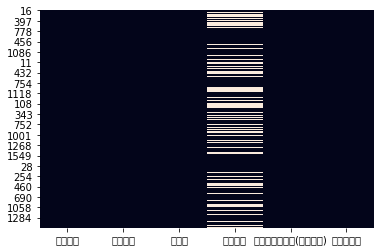

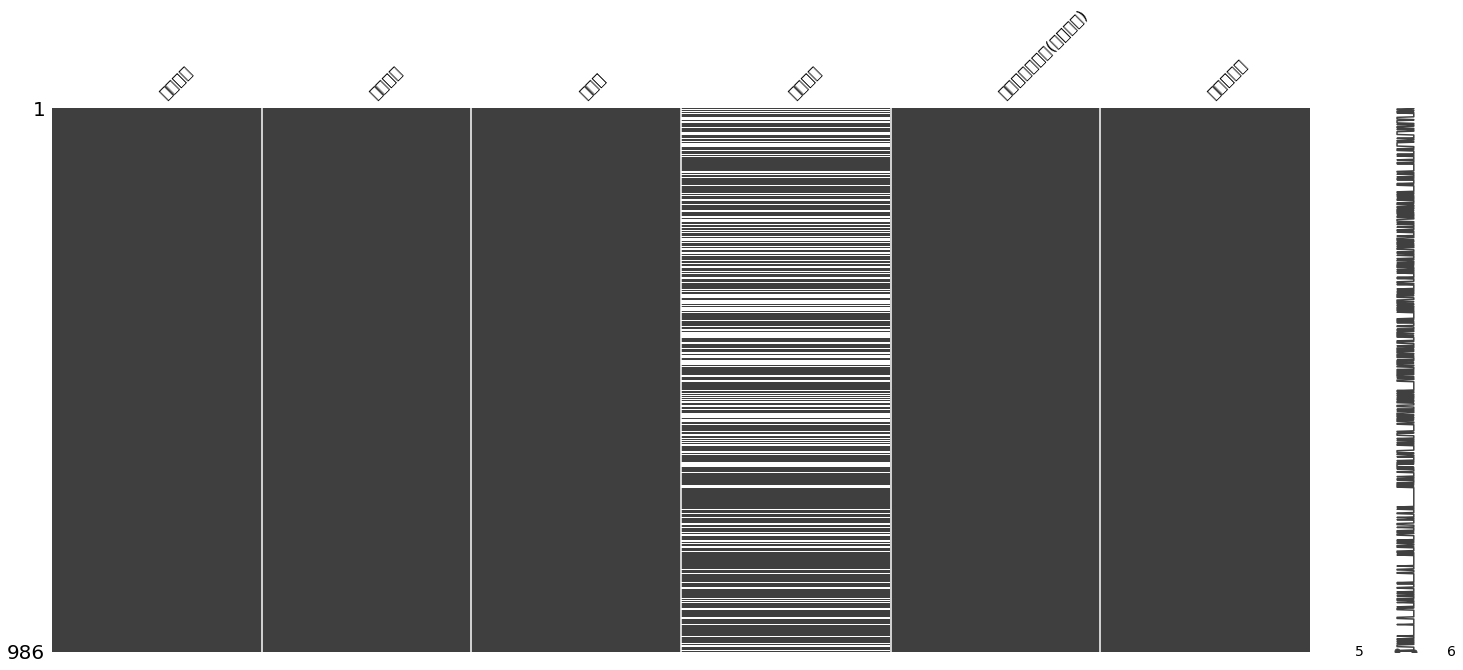

In [20]:
def show_na(df):
    # missing values
    missing_values_count = df.isnull().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing / total_cells) * 100
    print("missing percentage: {:.{prec}f}%".format(percent_missing, prec=2))

    sns.heatmap(df.isnull(), cbar=False)
    msno.matrix(df)
show_na(df_filter_b)

In [21]:
# df_filter_b.groupby(["交易標的"]).count().reset_index(name="count")
df_filter_b.groupby(['交易標的']).count()

,建物型態,總價元,車位類別,車位移轉總面積(平方公尺),車位總價元
交易標的,,,,,
建物,1,1,0,1,1
房地(土地+建物),317,317,0,317,317
房地(土地+建物)+車位,668,668,666,668,668


In [22]:
df_filter_b['總價元'] = df_filter_b['總價元'].astype(int)
df_filter_b['車位總價元'] = df_filter_b['車位總價元'].astype(int)

<ipython-input-22-787ea7aac102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_b['總價元'] = df_filter_b['總價元'].astype(int)
<ipython-input-22-787ea7aac102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_b['車位總價元'] = df_filter_b['車位總價元'].astype(int)


In [23]:
df_tmp = df_filter_b.groupby('交易標的').mean()
df_tmp

,總價元,車位總價元
交易標的,,
建物,5.650000e+06,0.000000
房地(土地+建物),8.462864e+06,0.000000
房地(土地+建物)+車位,1.602586e+07,893952.095808


In [24]:
df_tmp.unstack().reset_index()  # .drop('level_0', axis=1)

,level_0,交易標的,0
0,總價元,建物,5.650000e+06
1,總價元,房地(土地+建物),8.462864e+06
2,總價元,房地(土地+建物)+車位,1.602586e+07
3,車位總價元,建物,0.000000e+00
4,車位總價元,房地(土地+建物),0.000000e+00
5,車位總價元,房地(土地+建物)+車位,8.939521e+05


In [25]:
df_filter_b.groupby(['交易標的']).count().unstack().reset_index()  # .drop('level_0', axis=1)

,level_0,交易標的,0
0,建物型態,建物,1
1,建物型態,房地(土地+建物),317
2,建物型態,房地(土地+建物)+車位,668
3,總價元,建物,1
4,總價元,房地(土地+建物),317
5,總價元,房地(土地+建物)+車位,668
6,車位類別,建物,0
7,車位類別,房地(土地+建物),0
8,車位類別,房地(土地+建物)+車位,666
9,車位移轉總面積(平方公尺),建物,1


In [1]:
from PIL import Image
import pytesseract

ImageText = pytesseract.image_to_string(Image.open("../downloads/showPhone.png"), lang='eng',
           config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print(ImageText)

0935809258



In [27]:
ImageText = pytesseract.image_to_string(Image.open("../downloads/how_to_answer.jpg"), lang='chi_tra')
print(ImageText)

1. 不是 fiter_a 和fiter_b是兩件分開的事情
請排除該筆資料
<易筆棟數算出總車位數

   

因為所有的面試者都是使用MongoDB當作我們後
我們要從作業中知道面試者學習態力, 所以您前一封f

 

資料庫, 即使是沒有使用MongoDB的面試者也是,

 

1 Johnsonskill set中沒有MongoDB的經驗,他會以Nosgl完成題目的要求

   

 

事情是下允許的
至於時間上我們是可以

您要求Johnson改用MongoDB
johnson到4/26



In [28]:
ImageText = pytesseract.image_to_string(Image.open("../downloads/test.jpeg"), lang="chi_tra")
print( ImageText )

口單的正確使用時機

棉布印花口罩
或紗布口罩

人

僅能過濾較大顆粒,可作為保暖、
避免灰頭土臉與鼻孔骸髒等用途,
清洗後可重複使用。

一般醫療用,有呼吸道症狀、前往
醫院等密閉不通風場所,或前往有
呼吸道傳染病流行地區時佩戴,可
阻擋大部分的5微米顆粒,應每天
更換,但破損或弄髒應立即更換。

 

20207/1] /27   中央流行疫情指揮中心 關心您 (@ 蕉iWAN Gpc

可以吸附有機氣體、惡自分子及毒
性粉塵,不具殺菌功能,適合騎機
車、噴漆作業、噴滴農藥等時機使
用,一旦須費力呼吸或無法吸附異
味時應更換。

可阻擋95%以上的次微米顆粒,適
合第一線醫護人員使用,因呼吸阻
抗較高,不適合一般民眾長時間配
戴,且應避免重複使用。

芋

 



In [29]:
ImageText = pytesseract.image_to_string(Image.open("../downloads/mynote1.jpg"), lang="eng")
print( ImageText )

 

 

Container Instance ‘ {

   

1 Service

Task Task

A
Docker File

y crecte
Ene
1 pushed ing.

Contamer Registry
ECR, Docker Hub, seP-bopwd rgifery )

Instance

(Task

 

    
      

1 an “instance” .f tesk definition



## web crawling

In [30]:
import numpy as np
import pandas as pd

import pymysql 
import re
import json
import time
import datetime
from datetime import datetime

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException # 如果有 NoSuchElementException 的情況

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import csv
import xlrd
import calendar
from functools import reduce
from random import randint
import random

In [31]:
USER_AGENT_LIST = [
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; AcooBrowser; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0; Acoo Browser; SLCC1; .NET CLR 2.0.50727; Media Center PC 5.0; .NET CLR 3.0.04506)",
    "Mozilla/4.0 (compatible; MSIE 7.0; AOL 9.5; AOLBuild 4337.35; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
    "Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 2.0.50727; Media Center PC 6.0)",
    "Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 1.0.3705; .NET CLR 1.1.4322)",
    "Mozilla/4.0 (compatible; MSIE 7.0b; Windows NT 5.2; .NET CLR 1.1.4322; .NET CLR 2.0.50727; InfoPath.2; .NET CLR 3.0.04506.30)",
    "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN) AppleWebKit/523.15 (KHTML, like Gecko, Safari/419.3) Arora/0.3 (Change: 287 c9dfb30)",
    "Mozilla/5.0 (X11; U; Linux; en-US) AppleWebKit/527+ (KHTML, like Gecko, Safari/419.3) Arora/0.6",
    "Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.8.1.2pre) Gecko/20070215 K-Ninja/2.1.1",
    "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN; rv:1.9) Gecko/20080705 Firefox/3.0 Kapiko/3.0",
    "Mozilla/5.0 (X11; Linux i686; U;) Gecko/20070322 Kazehakase/0.4.5",
    "Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.8) Gecko Fedora/1.9.0.8-1.fc10 Kazehakase/0.5.6",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20",
    "Opera/9.80 (Macintosh; Intel Mac OS X 10.6.8; U; fr) Presto/2.9.168 Version/11.52",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.11 TaoBrowser/2.0 Safari/536.11",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.71 Safari/537.1 LBBROWSER",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; LBBROWSER)",
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E; LBBROWSER)",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 LBBROWSER",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; QQBrowser/7.0.3698.400)",
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.0; SV1; QQDownload 732; .NET4.0C; .NET4.0E; 360SE)",
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
    "Mozilla/5.0 (iPad; U; CPU OS 4_2_1 like Mac OS X; zh-cn) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8C148 Safari/6533.18.5",
    "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:2.0b13pre) Gecko/20110307 Firefox/4.0b13pre",
    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:16.0) Gecko/20100101 Firefox/16.0",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11",
    "Mozilla/5.0 (X11; U; Linux x86_64; zh-CN; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36",
    ]

In [32]:
url_1 = 'https://rent.591.com.tw/?kind=0&region=1'
url_2 = 'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=0&searchtype=1&firstRow=0&region=1'  # API url位置

i="30"
url = ("https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=0&searchtype=1&firstRow=%s&region=1") % i


res = requests.Session()  # 設置 resuest session
user_agent = random.choice(USER_AGENT_LIST) #隨機選擇 user_agent
# url_1 : for CSRF Token
url_1
headers1 = {"User-Agent": user_agent}
# 地區不是由 regionid控制，而是由"urlJumpIp"，要去設定cookies : https://ithelp.ithome.com.tw/articles/10191506
cookies = dict(urlJumpIp='1') # https://blog.m157q.tw/posts/2018/01/06/use-cookie-with-urllib-in-python/
resp = res.get(url_1,headers=headers1, cookies=cookies)
soup = BeautifulSoup(resp.text, 'lxml')
csrfToken = soup.find("meta", {"name":"csrf-token"})['content']
print("csrfToken:", csrfToken)

# for data
url_2 = url  # API url位置
headers2 = {"User-Agent": user_agent,
            "X-CSRF-TOKEN":csrfToken,
            }
getlist = res.get(url_2,headers=headers2, cookies=cookies)
data = json.loads(getlist.text.encode('utf-8')) # ASCII to utf8
data['data']['data']

csrfToken: zew9BCwz8uVYdwzq5bpKo0MDQW3R2l4eIdLxchBf


[{'id': 10645640,
  'user_id': 2169102,
  'address': '承德路四段12巷劍潭..',
  'type': '1',
  'post_id': 10645640,
  'regionid': 1,
  'sectionid': 8,
  'streetid': 25488,
  'room': 0,
  'area': 8,
  'price': '8,000',
  'storeprice': 0,
  'comment_total': 3,
  'comment_unread': 2,
  'comment_ltime': 1617891952,
  'hasimg': 1,
  'kind': 4,
  'shape': 1,
  'houseage': 0,
  'posttime': '45分鐘內',
  'updatetime': 1618033063,
  'refreshtime': 1618124402,
  'checkstatus': 0,
  'status': '',
  'closed': 0,
  'living': 'advstore,market,night,school',
  'condition': 'icebox,cold,washer,hotwater,broadband,naturalgas,landpost,trabus,girl,balcony_1,bed,wardrobe,bookTable,chair',
  'isvip': 1,
  'mvip': 1,
  'is_combine': 1,
  'cover': 'https://hp1.591.com.tw/house/active/2020/09/07/159948729686714908_210x158.crop.jpg',
  'browsenum': 178,
  'browsenum_all': 4511,
  'floor2': 0,
  'floor': 4,
  'ltime': '2021-04-11 15:01:16',
  'cases_id': 0,
  'social_house': 0,
  'distance': 0,
  'search_name': '',
  'maina

## nick_name
- 出租者 (陳先生)
- 出租者身份 (屋主)

## picture
- 聯絡電話 (02-25569419)

## kind_name
- 型態 (電梯大樓)
- 現況 (獨立套房)

- 性別要求 (男女生皆可)

## pymongo

In [42]:
import pymongo
connection = pymongo.MongoClient("localhost", 27017)
db = connection.test
print("connection.database_names():", connection.list_database_names())

connection.database_names(): ['admin', 'config', 'local', 'test']


<ipython-input-42-5ce4452730d3>:4: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  print("connection.database_names():", connection.database_names())


In [43]:
db.name

'test'

In [44]:
db.my_collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test'), 'my_collection')

In [45]:
print(db.list_collection_names())

['my_collection']


In [36]:
db.my_collection.insert_one({"x": 10}).inserted_id
# db.my_collection.insert_one({"x": 8}).inserted_id
# db.my_collection.insert_one({"x": 11}).inserted_id
db.my_collection.find_one()


{'_id': ObjectId('606ec97fff38d186e54d1866'), 'x': 10}

In [37]:
for item in db.my_collection.find():
    print(item["x"])

10
10
